In [0]:
# Importing libraries to plot and to compute eigen vals and vectors
import matplotlib.pyplot as plot
from scipy.linalg import eigh as largest_eigh
import numpy as np
import math

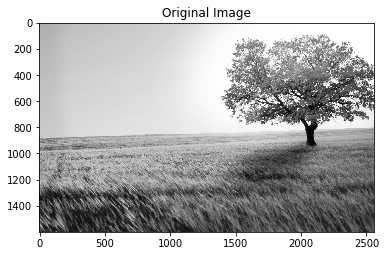

In [0]:
# Convertiing RGB image to gray
# function converting rgb to gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

# Reading image and plotting
img = plot.imread('44.jpg')
# Calling rgb2gray function
gray = rgb2gray(img)
plot.imshow(gray, cmap = plot.get_cmap('gray'))
plot.title('Original Image')
plot.show()

In [0]:
# converted from rgb to gray (2-Dimensional)
shape = gray.shape
shape

(1600, 2560)

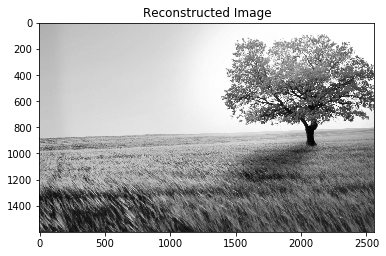

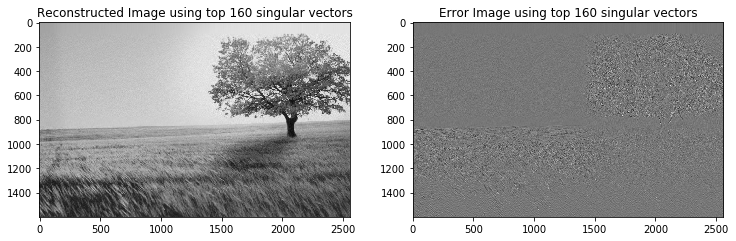

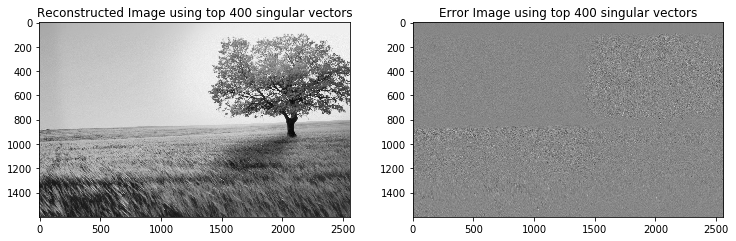

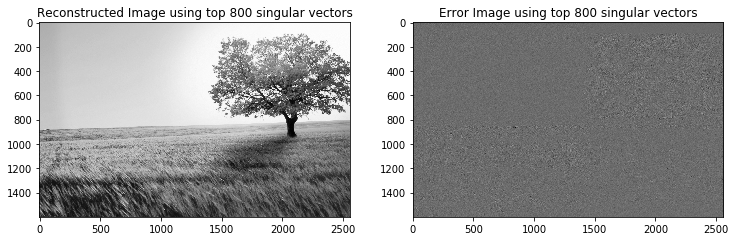

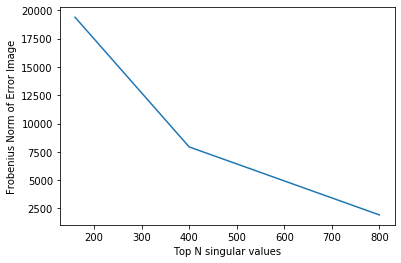

In [0]:
# Calculating dimension (m, n) for the given image
m = shape[0]
n = shape[1]
# Finding A_T_A and eigen vectors and eigen values
A_T_A = np.dot(gray.T, gray)
eigenValues, eigenVectors = largest_eigh(A_T_A, eigvals=(0, n-1))

#  Finding A_A_T matrix and eigen vectors and eigen values
A_A_T = np.dot(gray, gray.T)
eigenValues_u, eigenVectors_u = np.linalg.eigh(A_A_T)

#  Arranging eigen values and corresponding eigen vectors in descending order
eig = []
v   = []
u   = []
for i in reversed(range(n)):
  eig.append(eigenValues[i]) 
  v.append(eigenVectors[:,i])

# Finding Diagonal Matrix
s = np.zeros([m,n], dtype=float)
for i in range(0,m):
  s[i][i] = eig[i]

# Converting list 'v' to array and finding transpose
v = np.array(v)
v = v.T

# Finding u matrix
for i in range(m):
    u.append((1/s[i][i])*np.dot(gray,v[:,i]))

# Converting list 'u' to array and finding transpose
u = np.array(u)
u= u.T
# Taking v transpose
v =np.transpose(v)

# Multiplying u, s and v
image = np.dot(u, np.dot(s, v))

# plotting reconstructed image
plot.imshow(image, cmap = plot.get_cmap('gray'))
plot.title('Reconstructed Image')
plot.show()

# Storing top N % values in a list 
top_ratio = [0.1,0.25,0.5]

# Constructing image using top N singular vextors
top_n = []
Frobenius_norm = []
for i in range(len(top_ratio)):
  top_n.append(int(top_ratio[i]*m))

  # s_d is dummy matrix of our diagonal matrix
  s_d = s.copy()
  s_d_error = s.copy()

  # Making the remaining entries in singular matrix to zero
  for j in range(top_n[i]+1, m):
    s_d[j][j] = 0
  for k in range(0,top_n[i]):
    s_d_error[k][k] = 0

  # Multiplying u, s_d, v
  image1 = np.dot(u, np.dot(s_d, v))
  image_error = np.dot(u, np.dot(s_d_error, v))

  # Calculating Frobenius norm for error image
  Frobenius = np.subtract(image1, image)
  f_sum = 0;
  for x in range(m):
    for y in range(n):
      f_sum = f_sum + Frobenius[x][y]**2
  Frobenius_norm.append(np.sqrt(f_sum))

  # Reconstructing Image using top N singular values
  plot.figure(figsize=(4,4))
  plot.subplot(121)
  plot.imshow(image1, cmap = plot.get_cmap('gray'))
  plot.title('Reconstructed Image using top %i singular vectors' %(top_n[i]))
  
  # Error image
  plot.subplot(122)
  plot.imshow(image_error, cmap = plot.get_cmap('gray'))
  plot.title('Error Image using top %i singular vectors' %(top_n[i]))
  plot.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
  plot.show()
plot.figure()
plot.plot(top_n,Frobenius_norm)
plot.xlabel('Top N singular values')
plot.ylabel('Frobenius Norm of Error Image')
plot.show()


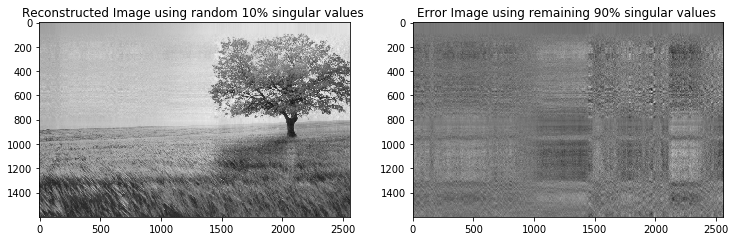

In [0]:
# Randomly selecting 10% singular values
import random 
index = []
s_rand = s.copy()
s_rand_error = s.copy()
#  Making s.v entries zero other than randomly selected 10%
for i in range(int(m*0.1)):
  index.append(((random.randint(0, m-1))))
  s_rand[index[i]][index[i]] = 0
#  singular values for error image
for i in range(m):
  if(i in index):
    continue
  else:
    s_rand_error[i][i]=0
# Calculating the reconstructed image using 10% singular values
image_rand = np.dot(u, np.dot(s_rand, v))
# Calculating the error image using 10% singular values
image_rand_error = np.dot(u, np.dot(s_rand_error, v))
# Plotting the images using subplot
plot.figure(figsize=(4,4))
plot.subplot(121)
plot.imshow(image_rand, cmap='gray')
plot.title('Reconstructed Image using random 10% singular values ')
plot.subplot(122)
plot.title('Error Image using remaining 90% singular values ')
plot.imshow(image_rand_error, cmap='gray')
plot.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
plot.show()

In [0]:
# Checking how good the image quality of reconstructed image using Frobenius norm
Frobenius = np.subtract(gray, image)
f_sum = 0;
for x in range(m):
  for y in range(n):
    f_sum = f_sum + Frobenius[x][y]**2
f_sum

6.7033394599282875e-12